In [242]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import csv
from sklearn.metrics import confusion_matrix

In [243]:
#x106 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\106.txt")
#x106=x106[:]
x116 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\116.txt")
x116=x116[:]
#x119 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\119.txt")
#x119=x119[:]
x200 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\200.txt")
x200=x200[:]
x201 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\201.txt")
x201=x201[:]
#x203 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\203.txt")
#x203=x203[:]
x208 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\208.txt")
x208=x208[:]
#x217 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\217.txt")
#x217=x217[:]
#x221 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\221.txt")
#x221=x221[:]
#x223 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\223.txt")
#x223=x223[:]
#x228 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\228.txt")
#x228=x228[:]
#x233 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\233.txt")
#x233=x233[:]

Text(0,0.5,'Amplitude')

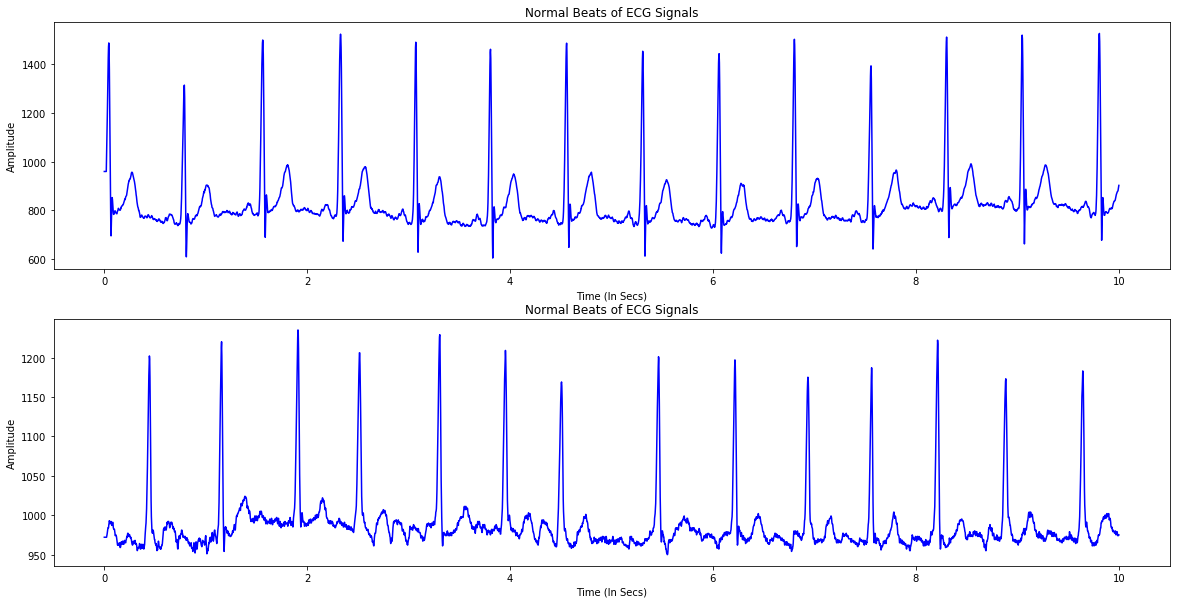

In [245]:
L=3600
Fs=360
plt.figure(figsize=(20,10))
t=np.linspace(1,L,L)/Fs
#Show Some Normal Beats
plt.subplot(2,1,1)
plt.plot(t,x116[0:L],'b-')
plt.title("Normal Beats of ECG Signals")
plt.xlabel("Time (In Secs)")
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(t,x201[0:L],'b-')
plt.title("Normal Beats of ECG Signals")
plt.xlabel("Time (In Secs)")
plt.ylabel("Amplitude")

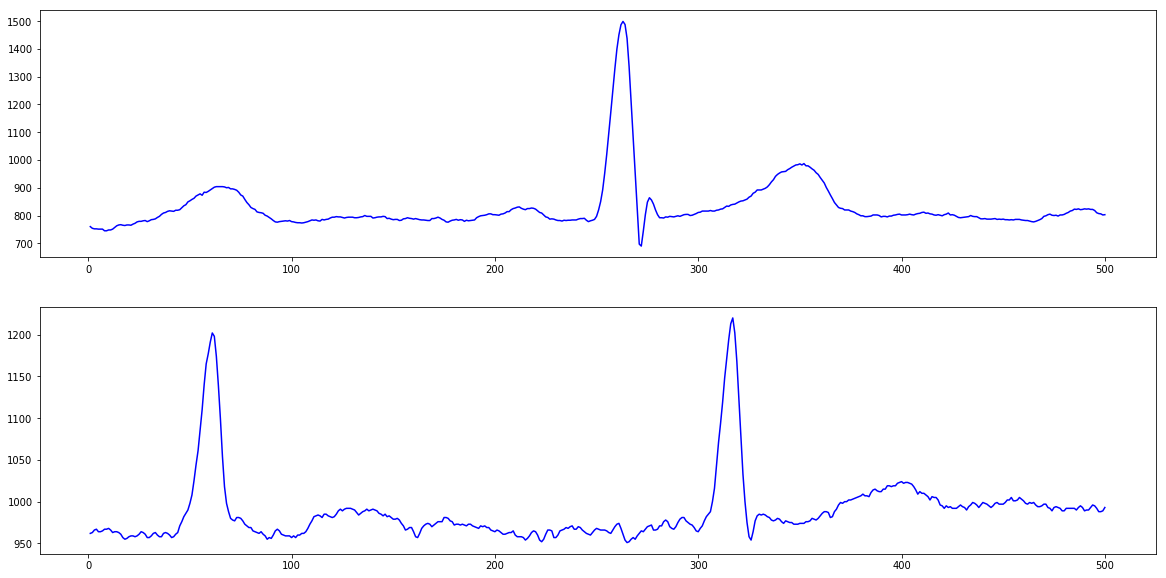

In [246]:
L=500
plt.figure(figsize=(20,10))
t=np.linspace(1,L,L)
#Show P, QRS & T
plt.subplot(2,1,1)
plt.plot(t,x116[300:L+300],'b-')
plt.subplot(2,1,2)
plt.plot(t,x201[100:L+100],'b-')

Text(0,0.5,'Amplitude')

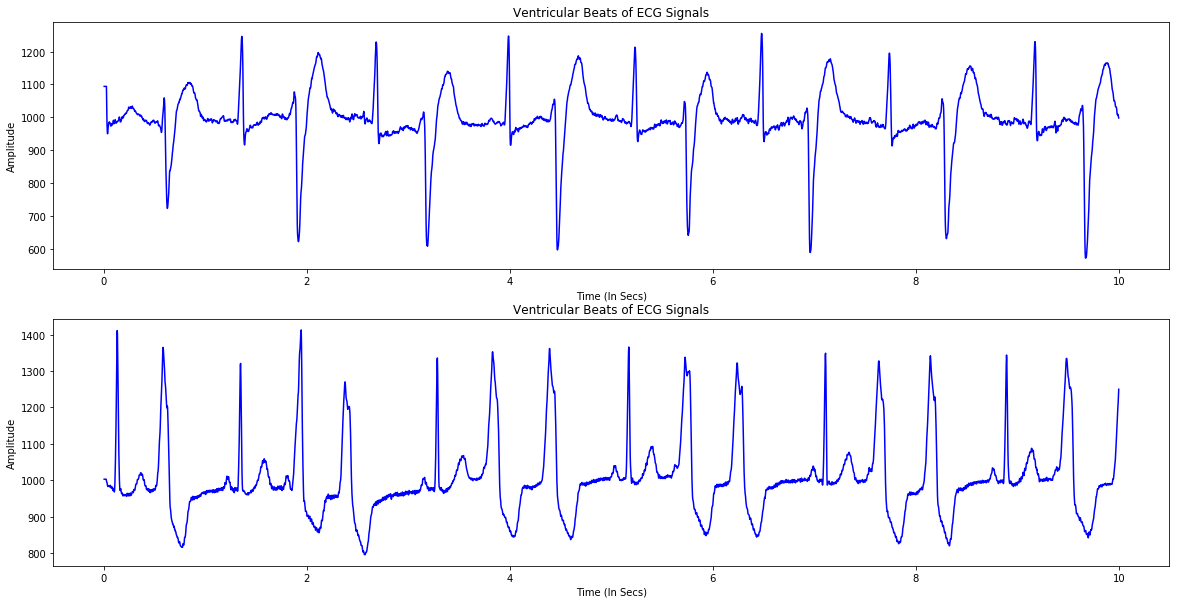

In [247]:
L=3600
Fs=360
plt.figure(figsize=(20,10))
t=np.linspace(1,L,L)/Fs
#Show Some Ventricular Beats
plt.subplot(2,1,1)
plt.plot(t,x200[0:L],'b-')
plt.title("Ventricular Beats of ECG Signals")
plt.xlabel("Time (In Secs)")
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(t,x208[0:L],'b-')
plt.title("Ventricular Beats of ECG Signals")
plt.xlabel("Time (In Secs)")
plt.ylabel("Amplitude")

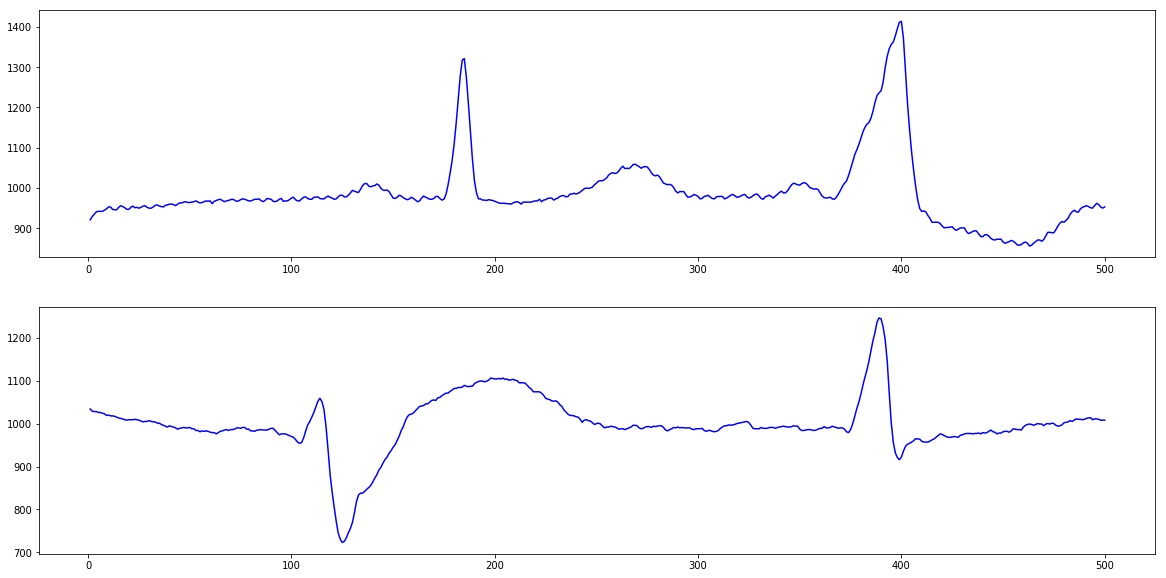

In [253]:
L=500
plt.figure(figsize=(20,10))
t=np.linspace(1,L,L)
#Show P, QRS & T
plt.subplot(2,1,1)
plt.plot(t,x208[300:L+300],'b-')
plt.subplot(2,1,2)
plt.plot(t,x200[100:L+100],'b-')

In [249]:
def bandpass_filter(x, lowcut, highcut, Fs, filter_order):
    nyquist_freq = 0.5 * Fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = signal.butter(filter_order, [low, high], btype="band")
    y = signal.lfilter(b, a, x)
    return (y,b,a)

def findpeaks(data, spacing, limit):
    #print(len(data),spacing)
    x = np.zeros(len(data) + 2 * spacing)
    x[:spacing] = data[0] - 1.e-6
    x[-spacing:] = data[-1] - 1.e-6
    x[spacing:spacing + len(data)] = data
    peak_candidate = np.zeros(len(data))
    peak_candidate[:] = True
    for s in range(spacing):
        start = spacing - s - 1
        h_b = x[start: start + len(data)]  # before
        start = spacing
        h_c = x[start: start + len(data)]  # central
        start = spacing + s + 1
        h_a = x[start: start + len(data)]  # after
        peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))
    ind = np.argwhere(peak_candidate)
    ind = ind.reshape(ind.size)
    if limit is not None:
        ind = ind[data[ind] > limit]
    return ind

In [250]:
qrs_116_ld = [282, 561, 837, 1104, 1369, 1639, 1909, 2180, 2447, 2718, 2987, 3255, 3529]

In [251]:
def calc_pre_rec(indices):
    ld = qrs_116_ld
    tp = 0
    i = 0
    j = 0
    g_set = set()
    while (j<len(indices)):
        if i < len(ld) and ld[i] < indices[j]:
            i += 1
            continue
        k = i-1
        count = False
        while k>=0 and ld[k] >= indices[j]-90:
            count = True
            g_set.add(k)
            k -= 1
        k = i
        while k < len(ld) and ld[k] <= indices[j]+90:
            count = True
            g_set.add(k)
            k += 1
        j += 1
        if count:
            tp += 1
    precision = tp/(len(indices)*1.0)
    recall = tp/(tp+(len(ld)*1.0)-len(g_set))
    return (precision, recall)            

[  29  293  572  848 1114 1379 1649 1920 2190 2458 2729 2997 3265 3539]
Precision: 0.9285714285714286
Recall: 1.0


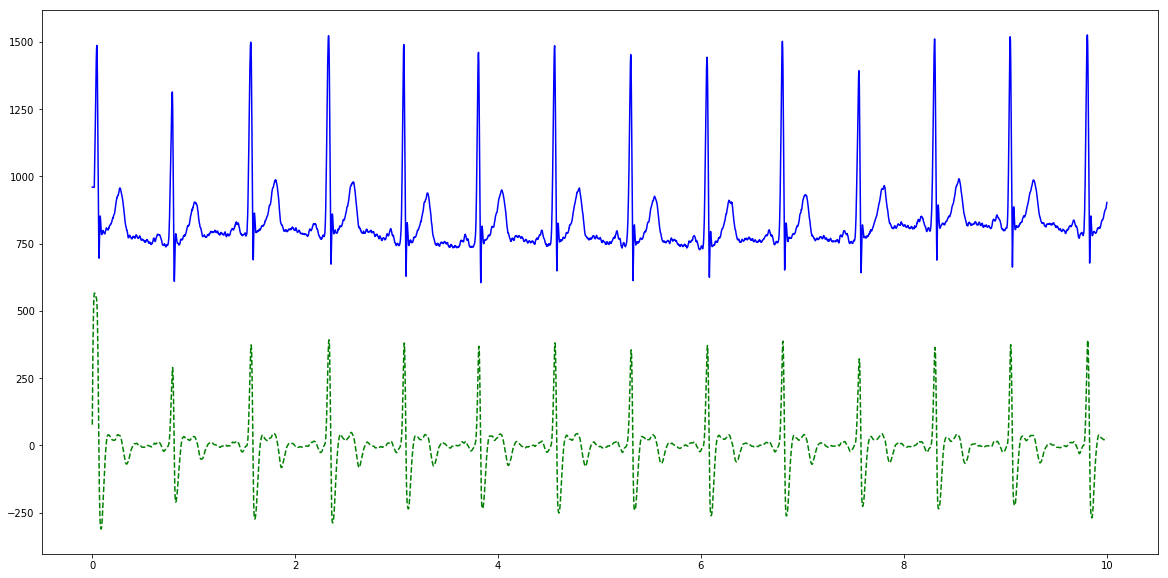

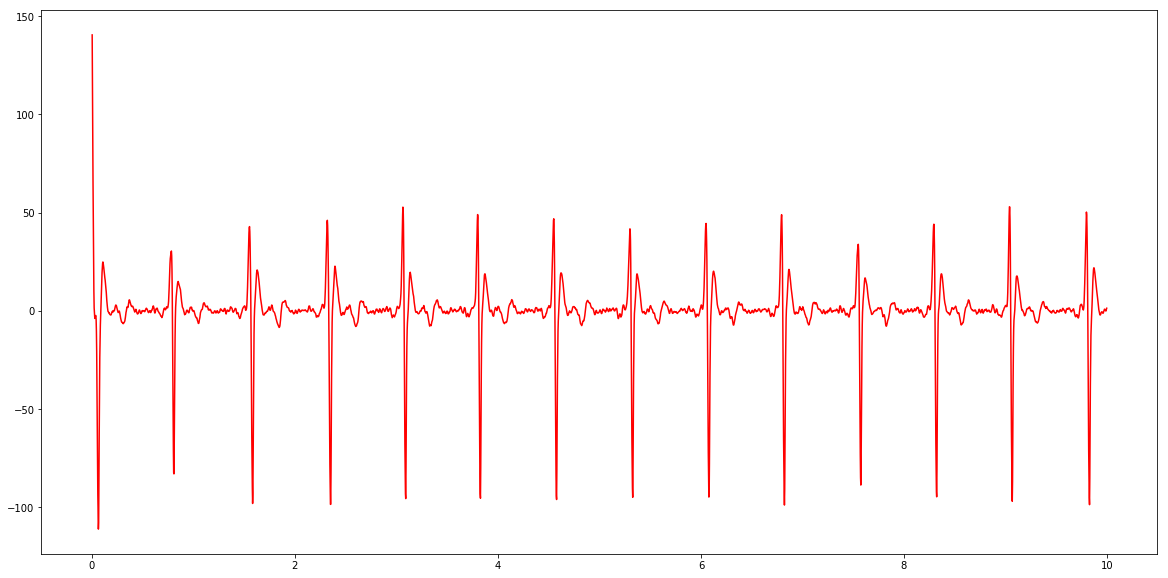

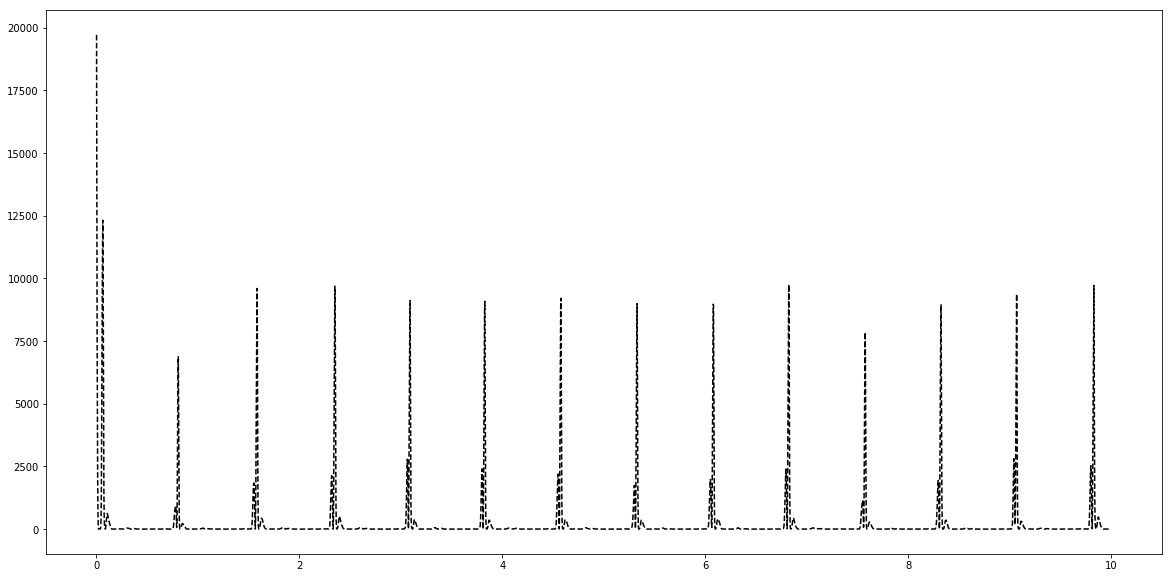

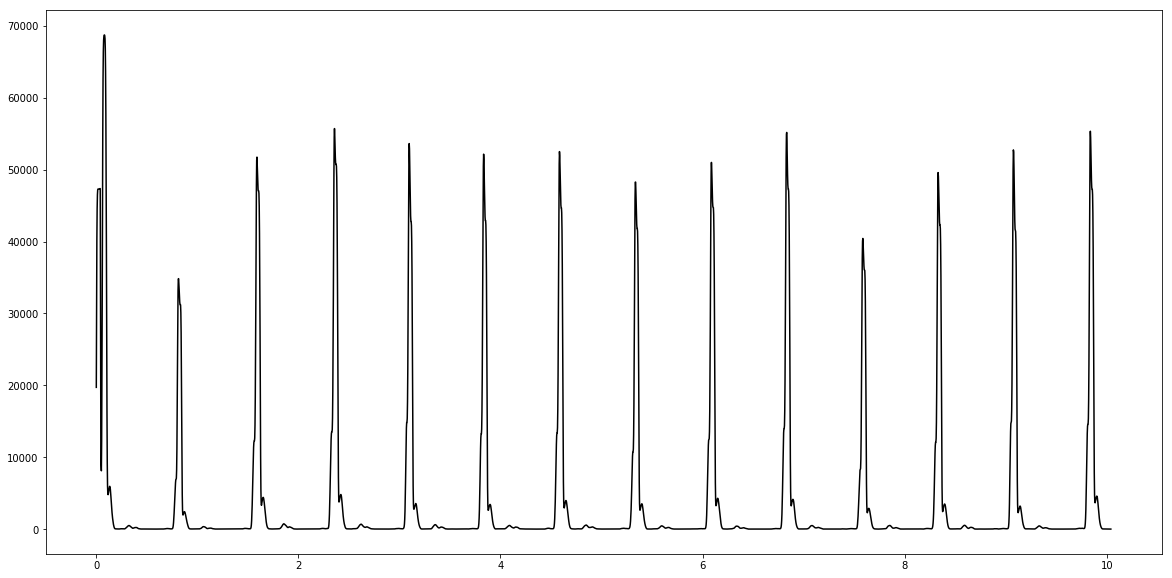

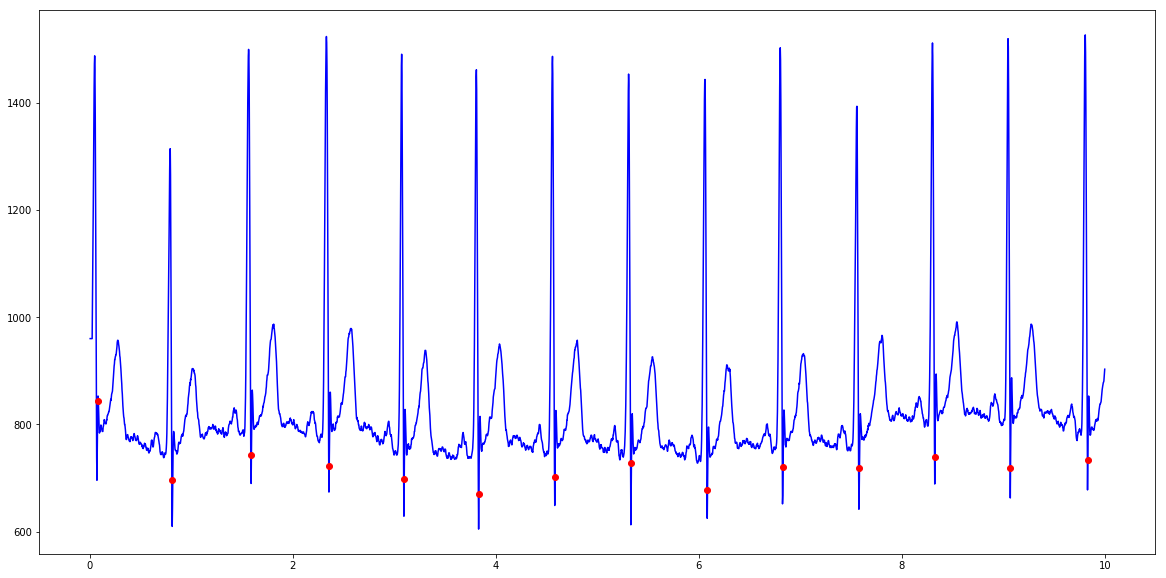

In [252]:
# Segment Original Signal
L=3600
x=x116[0:L]
t=np.linspace(1,L,L)/Fs

# Band-Pass Filter
(lowcut,highcut,filter_order)=(5,15,1)
(x_bfilt,b,a)=bandpass_filter(x, lowcut, highcut, Fs, filter_order)
#print(L,len(t),len(x))
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x_bfilt),len(x_bfilt))/Fs,x,'b-',t,x_bfilt,'g--')

# Differentiate
x_bfilt_diff=np.ediff1d(x_bfilt)
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x_bfilt_diff),len(x_bfilt_diff))/Fs,x_bfilt_diff,'r-')

# Square
x_bfilt_diff_sq=x_bfilt_diff**2
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x_bfilt_diff_sq),len(x_bfilt_diff_sq))/Fs,x_bfilt_diff_sq,'k--')

# Moving Average Filter
MAfilter_len=15
x_bfilt_diff_sq_smooth = np.convolve(x_bfilt_diff_sq, np.ones(MAfilter_len))
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x_bfilt_diff_sq_smooth),len(x_bfilt_diff_sq_smooth))/Fs,x_bfilt_diff_sq_smooth,'k-')

# Find Peaks
(findpeaks_limit,findpeaks_spacing)=(1,100)
peaks_indices = findpeaks(x_bfilt_diff_sq_smooth,findpeaks_spacing,findpeaks_limit)
print(peaks_indices)
(precision,recall) = calc_pre_rec(peaks_indices)
print("Precision: "+str(precision))
print("Recall: "+str(recall))
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x),len(x))/Fs,x,'b-',peaks_indices/Fs,x[peaks_indices], 'ro')

C:\Users\SAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


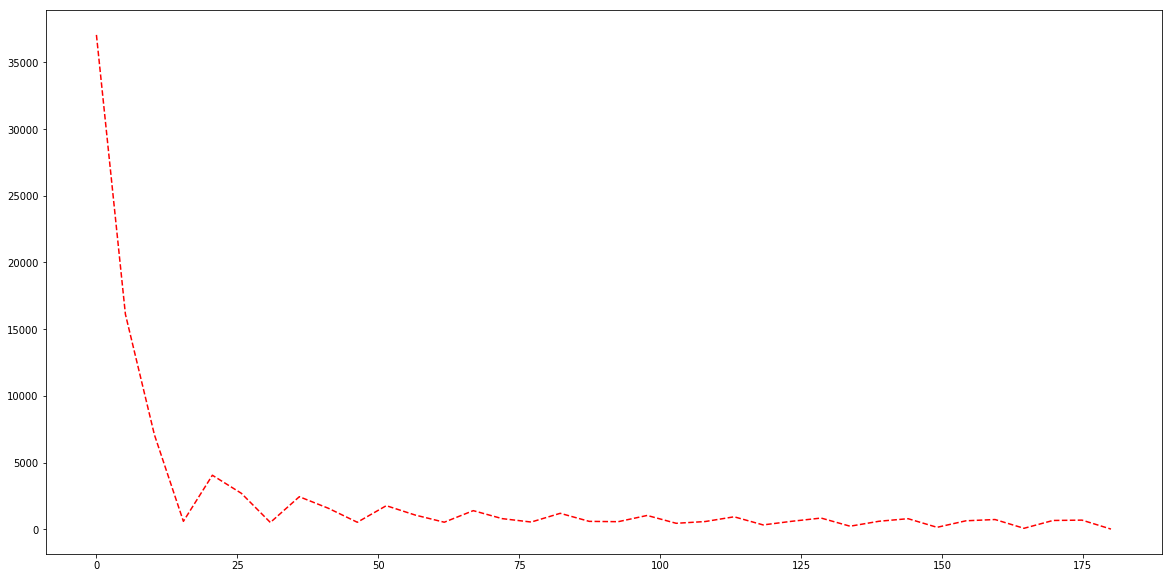

In [259]:
x116_P=x116[487:533];
N=70
fft_x116_P=np.fft.rfft(x116_P,N)
f = np.linspace(0,(Fs/2),N/2+1)
plt.figure(figsize=(20,10));plt.plot(f,np.abs(fft_x116_P),'r--');plt.show()

C:\Users\SAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


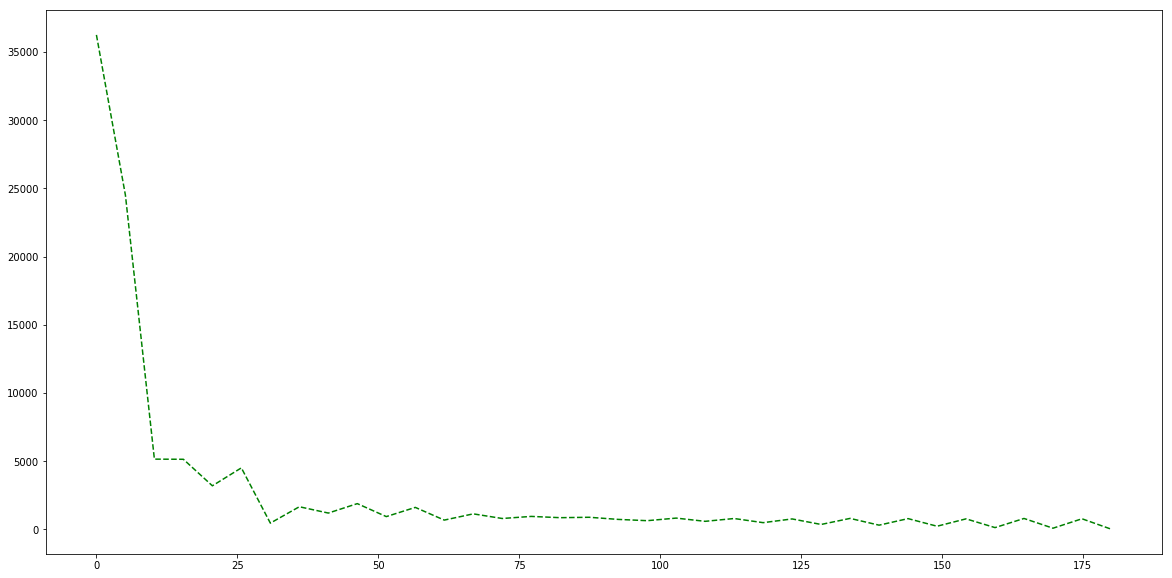

In [255]:
x116_QRS=x116[547:583];
N=70
fft_x116_QRS=np.fft.rfft(x116_QRS,N)
f = np.linspace(0,(Fs/2),N/2+1)
plt.figure(figsize=(20,10));plt.plot(f,np.abs(fft_x116_QRS),'g--');plt.show()

C:\Users\SAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


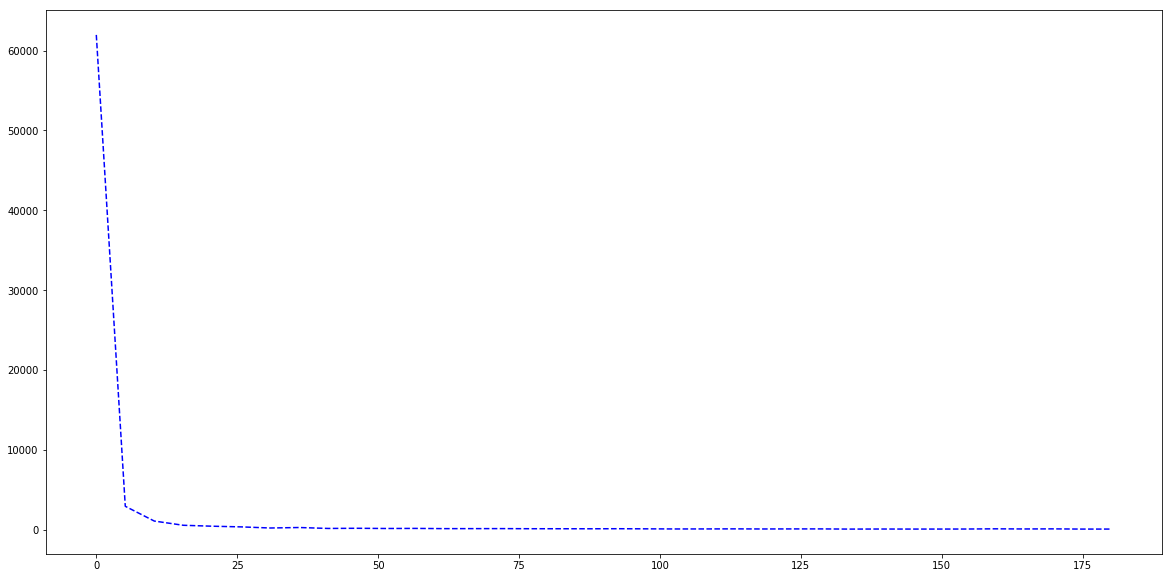

In [260]:
x116_T=x116[591:682];
N=70
fft_x116_T=np.fft.rfft(x116_T,N)
f = np.linspace(0,(Fs/2),N/2+1)
plt.figure(figsize=(20,10));plt.plot(f,np.abs(fft_x116_T),'b--');plt.show()